In [49]:
from fbprophet import Prophet

In [98]:
model = Prophet(changepoint_prior_scale=0.01)

In [51]:
import pandas as pd

In [52]:
df = pd.read_excel('C:/Users/HP/Downloads/Final/Final/Actuals.xlsx')

In [53]:
df.head()

,Time,Load (kW),Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh)
0,2017-03-18 00:00:00,1.031472e+06,1012.48000,2.125,79.333333,16.764386,285.25,6.25375
1,2017-03-18 01:00:00,1.007206e+06,1011.61875,0.000,82.166667,15.729386,285.00,9.20500
2,2017-03-18 02:00:00,9.861084e+05,1010.72000,2.125,81.666667,15.816886,316.00,11.28375
3,2017-03-18 03:00:00,9.707610e+05,1011.37625,17.125,82.250000,15.919386,327.00,7.16875
4,2017-03-18 04:00:00,9.622584e+05,1011.50000,18.625,82.333333,15.769386,282.25,0.78000


In [54]:
df1 = pd.DataFrame(df['Time'])

In [55]:
df2 = pd.DataFrame(df['Load (kW)'])

In [85]:
df3 = pd.concat([df1, df2], axis = 1)

In [86]:
df3.describe()

,Load (kW)
count,3.191200e+04
mean,1.152567e+06
std,1.506257e+05
min,8.454714e+05
25%,1.031650e+06
50%,1.114812e+06
75%,1.259393e+06
max,1.605192e+06


In [87]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31912 entries, 0 to 31911
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       31912 non-null  datetime64[ns]
 1   Load (kW)  31912 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 498.8 KB


In [88]:
df3.head()

,Time,Load (kW)
0,2017-03-18 00:00:00,1.031472e+06
1,2017-03-18 01:00:00,1.007206e+06
2,2017-03-18 02:00:00,9.861084e+05
3,2017-03-18 03:00:00,9.707610e+05
4,2017-03-18 04:00:00,9.622584e+05


In [89]:
df3.tail()

,Time,Load (kW)
31907,2020-11-06 11:00:00,1.242830e+06
31908,2020-11-06 12:00:00,1.239480e+06
31909,2020-11-06 13:00:00,1.234773e+06
31910,2020-11-06 14:00:00,1.240140e+06
31911,2020-11-06 15:00:00,1.222309e+06


In [90]:
df3 = df3.rename(columns = {'Time': 'ds'})

In [91]:
df3 = df3.rename(columns = {'Load (kW)': 'y'})

In [92]:
df3.head()

,ds,y
0,2017-03-18 00:00:00,1.031472e+06
1,2017-03-18 01:00:00,1.007206e+06
2,2017-03-18 02:00:00,9.861084e+05
3,2017-03-18 03:00:00,9.707610e+05
4,2017-03-18 04:00:00,9.622584e+05


In [93]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31912 entries, 0 to 31911
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      31912 non-null  datetime64[ns]
 1   y       31912 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 498.8 KB


In [94]:
#df3['y'] = df3['y'].fillna(df3['y'].mean())
#df3

In [95]:
#df3 = df3.dropna()

In [96]:
df3

,ds,y
0,2017-03-18 00:00:00,1.031472e+06
1,2017-03-18 01:00:00,1.007206e+06
2,2017-03-18 02:00:00,9.861084e+05
3,2017-03-18 03:00:00,9.707610e+05
4,2017-03-18 04:00:00,9.622584e+05
...,...,...
31907,2020-11-06 11:00:00,1.242830e+06
31908,2020-11-06 12:00:00,1.239480e+06
31909,2020-11-06 13:00:00,1.234773e+06
31910,2020-11-06 14:00:00,1.240140e+06


In [99]:
model.fit(df3)

In [101]:
future = model.make_future_dataframe(periods = int(24*365/2), freq = 'H')
future.tail()

,ds
36287,2021-05-07 23:00:00
36288,2021-05-08 00:00:00
36289,2021-05-08 01:00:00
36290,2021-05-08 02:00:00
36291,2021-05-08 03:00:00


In [102]:
future.head()

,ds
0,2017-03-18 00:00:00
1,2017-03-18 01:00:00
2,2017-03-18 02:00:00
3,2017-03-18 03:00:00
4,2017-03-18 04:00:00


In [103]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
36287,2021-05-07 23:00:00,898487.044873,726000.112391,1.069964e+06
36288,2021-05-08 00:00:00,870122.627738,706169.210567,1.040311e+06
36289,2021-05-08 01:00:00,847818.107908,674289.554909,1.019405e+06
36290,2021-05-08 02:00:00,831812.844276,665435.699344,1.009254e+06
36291,2021-05-08 03:00:00,818063.402533,648338.744661,9.891940e+05


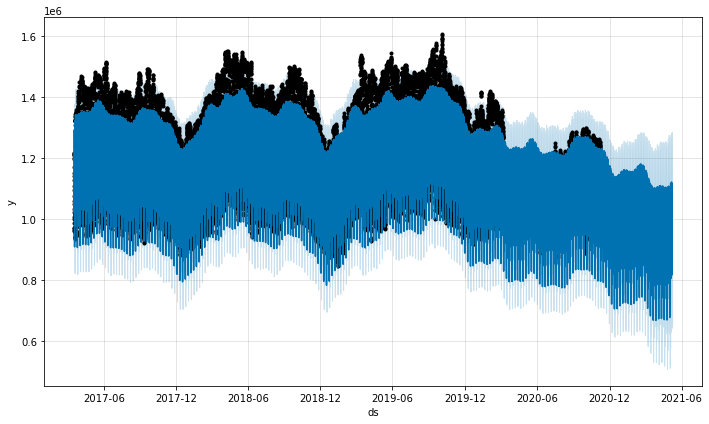

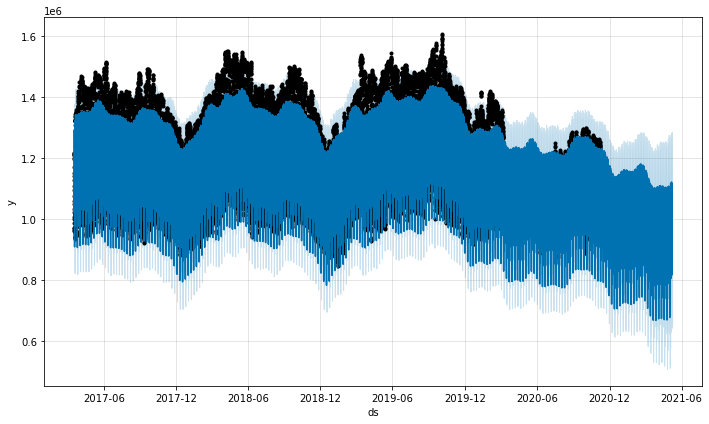

In [104]:
model.plot(forecast)